In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

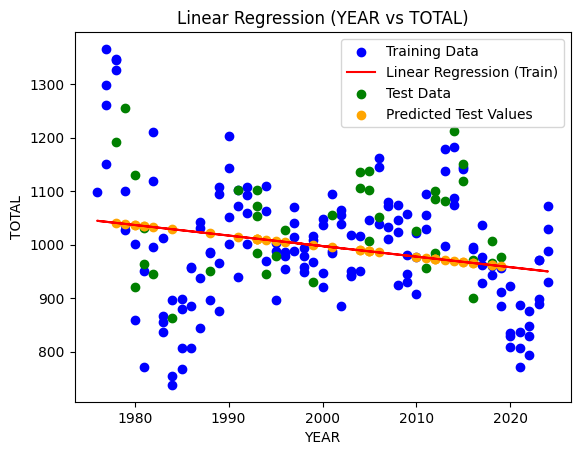

In [5]:
# Load the pre-split training and testing datasets
train_df = pd.read_csv("training&testing data/train_dataset.csv")  # Replace with your actual train file name
test_df = pd.read_csv("training&testing data/test_dataset.csv")    # Replace with your actual test file name

# Extract YEAR (independent variable) and TOTAL (dependent variable)
X_train = train_df["YEAR"].values.reshape(-1, 1)
y_train = train_df["state_total"].values

X_test = test_df["YEAR"].values.reshape(-1, 1)
y_test = test_df["state_total"].values

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# Plot training data
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(X_train, y_pred_train, color="red", label="Linear Regression (Train)")

# Plot test data
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.scatter(X_test, y_pred_test, color="orange", label="Predicted Test Values")

plt.xlabel("YEAR")
plt.ylabel("TOTAL")
plt.title("Linear Regression (YEAR vs TOTAL)")
plt.legend()
plt.show()